# Final Project

# Pittsburgh's Best Neighborhood

Group Members: Carl Jin (chj113@pitt.edu); Chengxiang Huang (chh315@pitt.edu); Wenye Han （weh113@pitt.edu）；

Final Project Group 3 

Data Sets: <br>
https://data.wprdc.org/dataset/pgh<br>
https://data.wprdc.org/dataset/pgh/resource/204f63f4-296f-4f1d-bbdd-946b183fa5a0?inner_span=True<br>
https://data.wprdc.org/dataset/arrest-data<br>
https://data.wprdc.org/dataset/police-zones<br>

https://data.wprdc.org/dataset/pgh/resource/5d61b60b-bd25-4c33-8420-e31a9135ec6e

https://data.wprdc.org/dataset/pittsburgh-internet-service-providers-by-block-june-2016

# Metric

Our metric incorporates three features: transportation, crime rate, and internet access. We assess restaurant variety, crime statistics, and internet coverage. Through this analysis, we aim to provide a comprehensive evaluation of each neighborhood's livability and desirability.

# Crime

In [21]:
crime = pd.read_csv("crime.csv")
crime.head(10)

,_id,Neighborhood,Sector #,Population (2010),#Part 1 (Major Crime) Reports (2010),#Part 2 Reports (2010),#Other Police Reports (2010),Part 1 Crime per 100 Persons (2010),Part 2 Crime per 100 Persons (2010),#Murder (2010),#Rape (2010),#Robbery (2010),#Agr. Assault (2010),#Burglary (2010),#Auto Theft (2010),#Drug Violations (2010)
0,1,Allegheny Center,3,933,71,141,46,7.6,15.1,0,2,9,5,8,5,31
1,2,Allegheny West,3,462,38,49,31,8.2,10.6,1,0,4,6,6,4,12
2,3,Allentown,6,"2,500",159,252,160,6.4,10.1,0,2,15,23,48,11,66
3,4,Arlington,7,"1,869",50,84,48,2.7,4.5,0,1,8,5,15,7,9
4,5,Arlington Heights,7,244,19,37,24,7.8,15.2,0,0,4,5,5,3,7
5,6,Banksville,5,"4,144",62,81,61,1.5,2.0,0,0,2,5,9,5,7
6,7,Bedford Dwellings,15,"1,202",42,80,38,3.5,6.7,0,0,7,8,8,2,25
7,8,Beechview,5,"7,974",193,303,148,2.4,3.8,1,1,7,9,47,37,29
8,9,Beltzhoover,6,"1,925",83,131,85,4.3,6.8,1,0,6,10,28,8,38
9,10,Bloomfield,12,"8,442",453,371,296,5.4,4.4,0,3,45,20,70,36,42


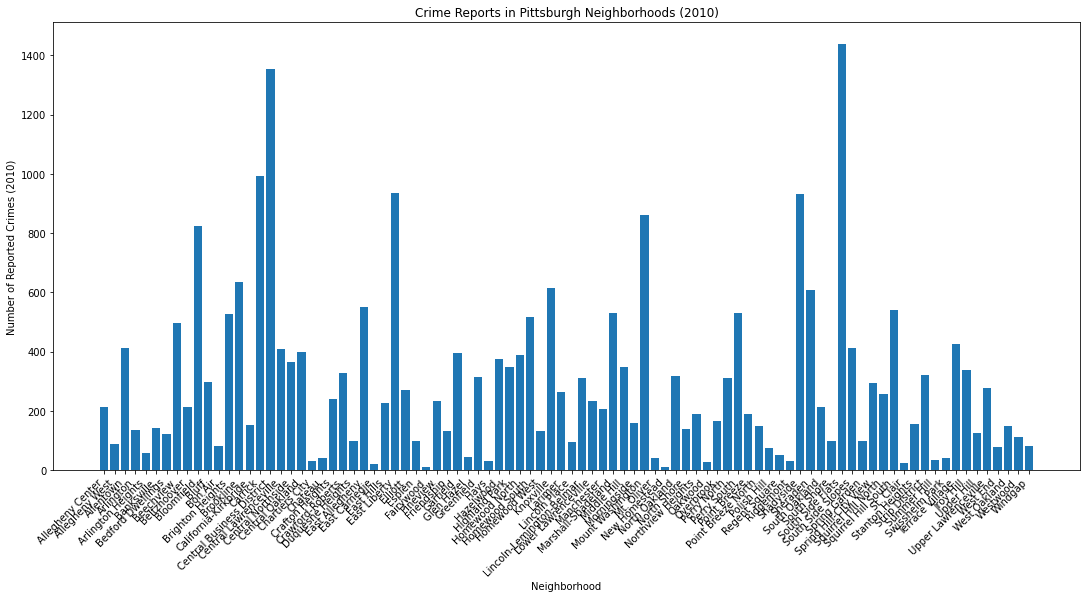

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load crime data (replace with the path to your CSV file)
crime = pd.read_csv("crime.csv")

# Find alternative columns for reported crimes (assuming Part 1 and Part 2)
part1_crimes = crime['#Part 1 (Major Crime) Reports (2010)']
part2_crimes = crime['#Part 2 Reports (2010)']

# Calculate total reported crimes
total_crimes = part1_crimes + part2_crimes

# Extract neighborhood names
neighborhoods = crime['Neighborhood']

# Filter data (optional - uncomment if you want to filter)
# filtered_neighborhoods = neighborhoods[:10]  # Example: Filter to top 10
# filtered_crimes = total_crimes[:10]  # Adjust filtering based on neighborhoods

# Truncate neighborhood names (optional - uncomment if needed)
# max_name_length = 15  # Example: Truncate to 15 characters
# neighborhoods = [name[:max_name_length] + "..." if len(name) > max_name_length else name for name in neighborhoods]

# Increase figure size for better readability
plt.figure(figsize=(15, 8))

# Create bar chart
plt.bar(neighborhoods, total_crimes)

# Rotate and right-align x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Tight layout for improved spacing
plt.tight_layout()

plt.xlabel('Neighborhood')
plt.ylabel('Number of Reported Crimes (2010)')
plt.title('Crime Reports in Pittsburgh Neighborhoods (2010)')

plt.show()


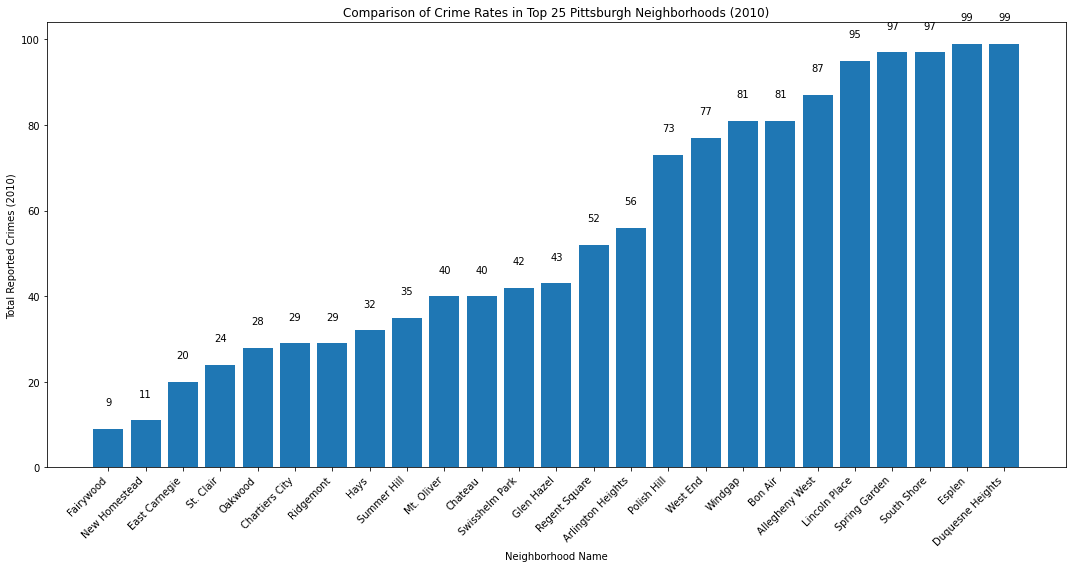

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

crime_data = pd.read_csv("crime.csv")
neighborhoods = crime_data['Neighborhood']

# Check for 'Total Crime Reports (2010)' column
if 'Total Crime Reports (2010)' in crime_data.columns:
  # Use preferred column if available
  total_crimes = crime_data['Total Crime Reports (2010)']
else:
  print("Warning: 'Total Crime Reports (2010)' column not found. Using Part 1 and Part 2 crimes.")
  part1_crimes = crime_data['#Part 1 (Major Crime) Reports (2010)']
  part2_crimes = crime_data['#Part 2 Reports (2010)']
  total_crimes = part1_crimes + part2_crimes

# Sort together by total crimes (ascending - lowest to highest)
sorted_data = pd.DataFrame({'Neighborhood': neighborhoods, 'Total Crimes': total_crimes}).sort_values(by='Total Crimes')

# Select top 25 neighborhoods
top_25_neighborhoods = sorted_data['Neighborhood'].head(25).tolist()
top_25_crimes = sorted_data['Total Crimes'].head(25).tolist()

# Create a bar chart
fig, ax = plt.subplots(figsize=(15, 8))  # Adjust figure size as needed

# Create bars
bars = ax.bar(top_25_neighborhoods, top_25_crimes)

# Annotate bars with crime counts (using xycoords='top' for placement)
for bar, crime_count in zip(bars, top_25_crimes):
  yval = bar.get_height()  # Get bar height
  ax.text(bar.get_x() + bar.get_width() / 2, yval + 5, crime_count, ha='center', va='bottom')  # Annotate with count (offset slightly above the bar)

# Set labels and title
ax.set_xlabel('Neighborhood Name')
ax.set_ylabel('Total Reported Crimes (2010)')
ax.set_title('Comparison of Crime Rates in Top 25 Pittsburgh Neighborhoods (2010)')

# Rotate x-axis labels (optional)
plt.xticks(rotation=45, ha='right')

# Tight layout for better spacing

plt.tight_layout()
plt.show()

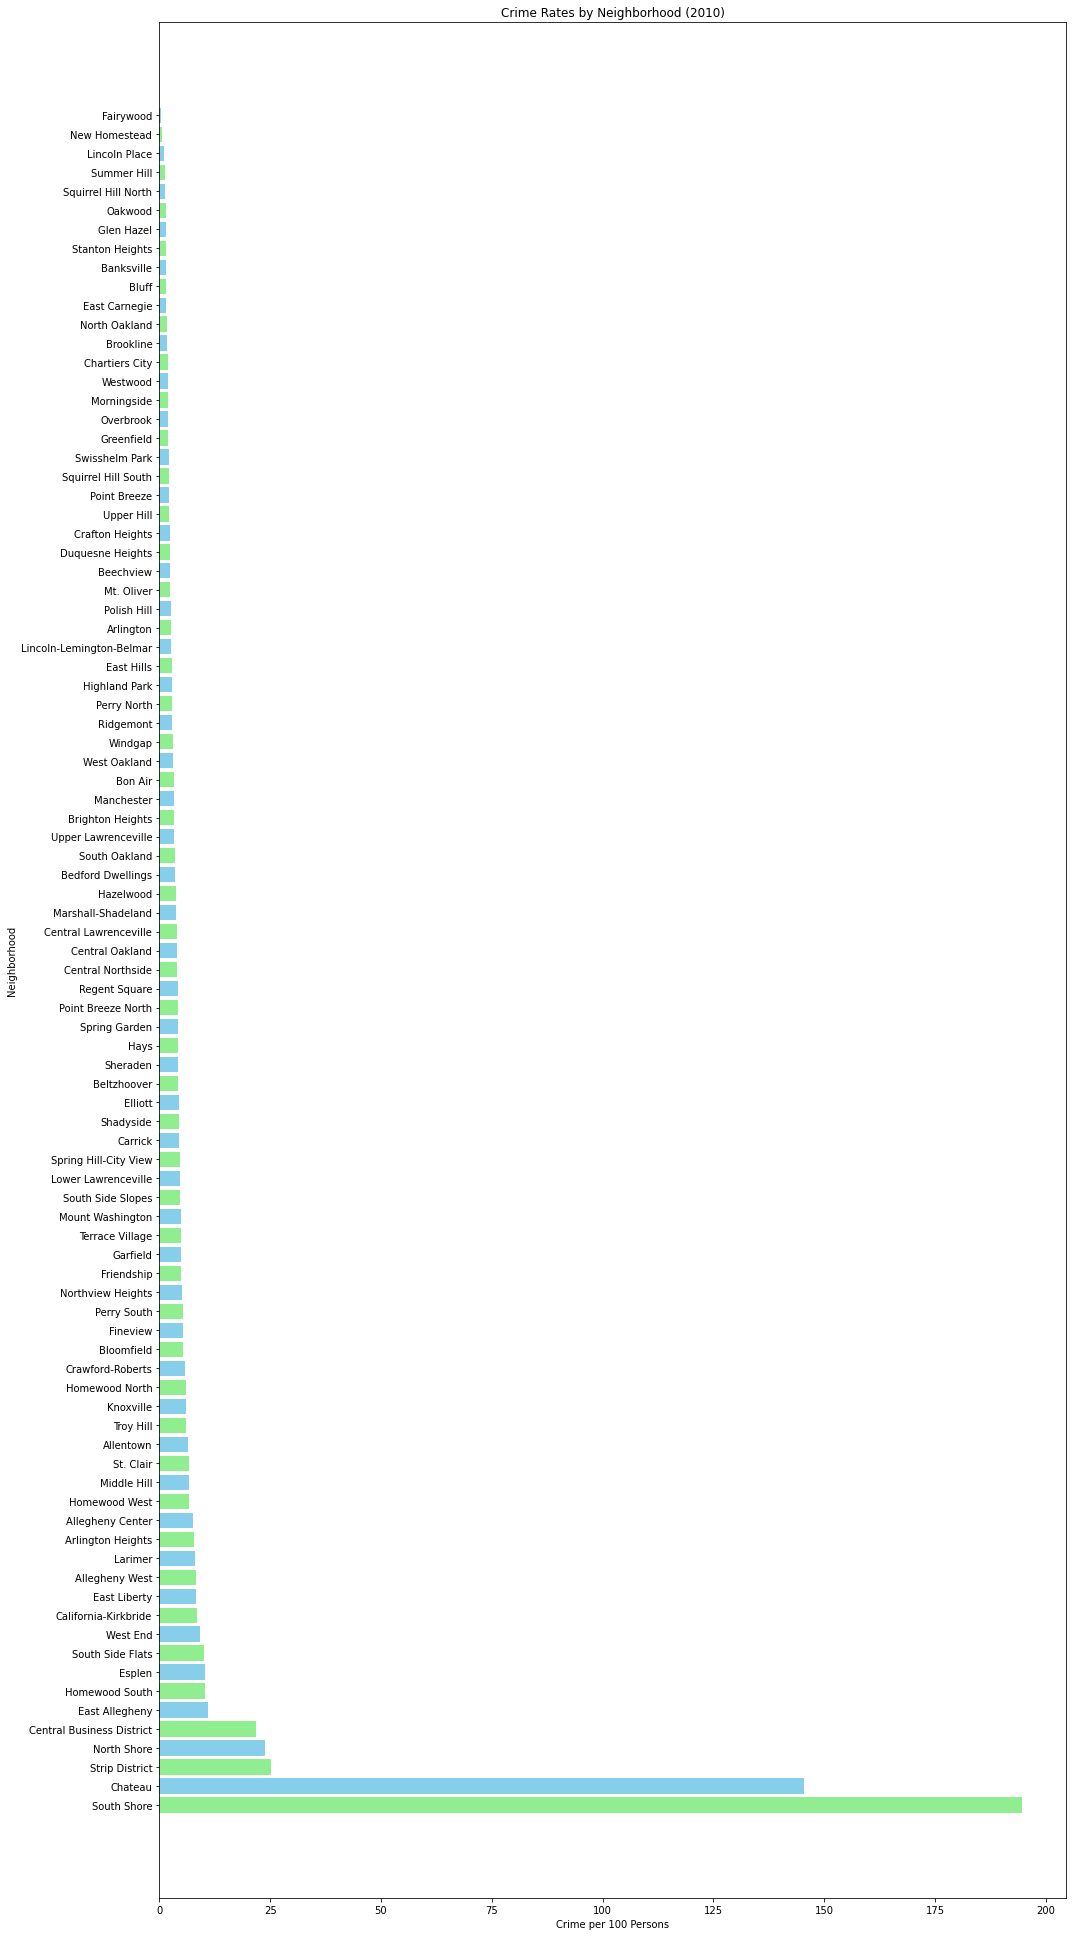

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

crime = pd.read_csv("crime.csv")

# Sort the DataFrame by 'Part 1 Crime per 100 Persons (2010)'
crimesort = crime.sort_values(by=["Part 1 Crime per 100 Persons (2010)"], ascending=True)

# Create colors list with alternating colors for odd and even rows
colors = ['skyblue' if i % 2 == 0 else 'lightgreen' for i in range(len(crimesort))]

# Create the chart
plt.figure(figsize=(15, crime.shape[0]*0.3))  # Adjust the figure size as needed
plt.barh(crimesort['Neighborhood'], crimesort['Part 1 Crime per 100 Persons (2010)'], color=colors)
plt.xlabel('Crime per 100 Persons')
plt.ylabel('Neighborhood')
plt.title('Crime Rates by Neighborhood (2010)')
plt.gca().invert_yaxis()  # Invert the y-axis to display the neighborhood with the highest crime rate at the top
plt.tight_layout()

# Display the chart
plt.show()


In [1]:
import pandas as pd

# Read the data from the CSV file
crime = pd.read_csv("crime.csv")

# Sort and display the DataFrame
crimesort = crime.sort_values(by=["Part 1 Crime per 100 Persons (2010)"], ascending=True)
print(crimesort[['Neighborhood', 'Part 1 Crime per 100 Persons (2010)']].head(30))


                Neighborhood  Part 1 Crime per 100 Persons (2010)
31                 Fairywood                                  0.3
54             New Homestead                                  0.7
45             Lincoln Place                                  1.0
80               Summer Hill                                  1.2
75       Squirrel Hill North                                  1.3
58                   Oakwood                                  1.4
35                Glen Hazel                                  1.4
78           Stanton Heights                                  1.5
5                 Banksville                                  1.5
10                     Bluff                                  1.6
26             East Carnegie                                  1.6
55             North Oakland                                  1.7
13                 Brookline                                  1.8
20            Chartiers City                                  1.9
88        

# Transportation

In [4]:
import pandas as pd

# Specify the file path (replace with the actual location of your Excel file)
file_path = 'september-2023.xlsx'  

try:
  # Attempt to read the Excel file using xlrd (default engine)
  data = pd.read_excel(file_path)
  print("Excel file read successfully using xlrd engine.")

except ValueError:
  # If xlrd fails, try openpyxl for newer Excel formats
  print("xlrd engine failed. Trying openpyxl...")
  try:
    data = pd.read_excel(file_path, engine='openpyxl')
    print("Excel file read successfully using openpyxl engine.")
  except Exception as e:  # Catch any other errors during reading
    print(f"An error occurred while reading the Excel file: {e}")

# Now you can proceed with processing the data in the 'data' DataFrame
if 'data' in locals():  # Check if data was successfully loaded
  # Calculate average duration for each start and end station
  # (assuming columns named 'Start Station' and 'End Station' exist)
  average_durations = data.groupby(['Start Station', 'End Station'])['duration'].mean()
  print(average_durations)


xlrd engine failed. Trying openpyxl...
An error occurred while reading the Excel file: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the Excel file
file_path = 'october-2023.xlsx'  # Change this to the path of your Excel file
data = pd.read_excel(file_path)

# Calculate average duration for each start and end station
avg_duration_start = data.groupby('Start Station Name')['Duration'].mean().sort_values(ascending=False)
avg_duration_end = data.groupby('End Station Name')['Duration'].mean().sort_values(ascending=False)

# Select the top 10 stations for visualization
top_start_stations = avg_duration_start.head(10)
top_end_stations = avg_duration_end.head(10)

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(14, 12))
ax[0].bar(top_start_stations.index, top_start_stations.values, color='blue')
ax[0].set_title('Average Rental Duration by Start Station (Top 10)')
ax[0].set_ylabel('Average Duration (seconds)')
ax[0].set_xticklabels(top_start_stations.index, rotation=45, ha='right')

ax[1].bar(top_end_stations.index, top_end_stations.values, color='green')
ax[1].set_title('Average Rental Duration by End Station (Top 10)')
ax[1].set_ylabel('Average Duration (seconds)')
ax[1].set_xticklabels(top_end_stations.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Internet